# How to perform regression in python (OLS)

In order to perform the regression i need to import some python libraries.

In [1]:
!pip install linearmodels

In [2]:
import numpy as np
import pandas as pd

In [3]:
import yfinance as yf

I use the Yahoo finace API in order to download directly the data from the web. We need the tickets of the stocks an also we have to define the period of time. the code is: data=yf.download("ticket", start='initial data',end='ending data' progress=False)

In [4]:
JPM= yf.download("JPM", start= '2000-09-09', end= '2022-09-09', progress= False)

In [5]:
EUR_USD= yf.download("EURUSD=X", start= '2000-09-09', end= '2022-09-09', progress= False)

I would like to see if EUR/USD exchange rate and Fed funds can explain JPM log returns.

In [6]:
JPM.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-08,56.875,58.3125,56.75,57.8125,30.285322,4496500
2000-09-11,57.500,58.3750,56.50,57.5000,30.121624,5219500


In [7]:
EUR_USD.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0


In ordert to display the data we use .head() that can be use with dataframe objects, if you want to display more or less lines you can add the number between brackets. example: varibles.head(10) for the first ten lines. The code for display the last lines(if you have dataframe) is .tail() and it works as .head()

In order to import Fed Funds i have dowloaded from FREED website in xlsx format and i adjusted manually on the excel sheet ( i only create 2 columns one with the Fed funds and one with the dates).
Import a excel file is not difficult if you use pandas library follow the following code:

pd.read_excel('/USER/...../name of the file.xlsx', index_col='date')  

If you have csv file you have to use this code:

pd.DataFrame = pd.read_csv("/Users/.../name of the file.csv", index_col="Date", decimal=",",sep=";")

IMPORTANT : write the correct file path if you use windows you have probably to reverse \ to /

In [8]:
Fedfunds:pd.DataFrame=pd.read_excel('/Users/niccolomassoni/Desktop/FEDFUNDS2000-2022.xlsx', index_col='date')
Fedfunds.head(2)

,FED FUNDS
date,
2000-09-09,6.5
2000-09-10,6.5


If we want work with the return and log-return we need to extract the Close price of each stocks, we can select all the data using the pandas command .loc[:,['Name of the columns']] . if we want more than one data we can add the name of differetn columns. example: .loc[:,['col 1','col 2]]

In [9]:
JPM_Close=JPM.loc[:,['Close']]

In [10]:
EUR_USD_Close=EUR_USD.loc[:,['Close']]

We can use the concat command in order to create a dataframe in which we can add all of the single stocks close prices,in this way we can have a table of data that can be easily visualized and used to calculate with only one line code the log returns. The concat function command is pd.concat([variables,...1,...2], join='inner',axis='1') . In order to avoid confusion we have to rename the columns, the command is .columns=['name1','name2'....] is important to follow the same order of the variables.

In [11]:
data:pd.DataFrame=pd.concat([EUR_USD_Close,JPM_Close], join='inner', axis=1 )
data.columns=['EUR USD', 'JPM']
data.head(2)

,EUR USD,JPM
Date,,
2003-12-01,1.196501,35.660000
2003-12-02,1.208897,35.810001


In finance we can use the log-returns that can give a better graphical rappresentation of the data. After have built a dataframe with all the close prices, we can use this code to obtain all the log-returns for the single stocks. The command is np.log(varible).diff().dropna() the second part of the code .diff() allow us to obtain the returns that are the difference between the log_prices time t+1 - log_prices time t. The use of .dropna() is also important to delete the nan line(not define value) that we will have due to the loss of the first observation .

In [12]:
data_lret=np.log(data).diff().dropna()
data.head(2)

,EUR USD,JPM
Date,,
2003-12-01,1.196501,35.660000
2003-12-02,1.208897,35.810001


I export the JPM logreturn that i will use as Y in my regression.

In [13]:
JPM_lret=data_lret.loc[:,['JPM']]
JPM_lret.head(2)

,JPM
Date,
2003-12-02,0.004198
2003-12-03,-0.000279


I don't need to recreate a new dataframe, i can use the previous one dropping the JPM log return column.
This command can be used when you are working with dataframe and it is:
your_variable.drop(columns=['name of the column'])

In [14]:
EURUSD_lret=data_lret.drop(columns=['JPM'])
EURUSD_lret.head(2)

,EUR USD
Date,
2003-12-02,0.010307
2003-12-03,0.002809


I start to create the matrix for the explanatory variables in this case EUR USD exchange rate (log returns) and FED funds.

In [15]:
X= pd.concat([EURUSD_lret,Fedfunds], join='inner', axis=1 )
X.head(2)

,EUR USD,FED FUNDS
2003-12-02,0.010307,0.97
2003-12-03,0.002809,0.98


In order to perform Regression we need to insert a costant value.
We use .insert(0,'Constant',1,allow_duplicates=True) command; the first input is the position where we want 
to add the value, the second one is the name of the column, the third is the variable in this case 1. 
We need also to define if we want duplicates, in this case is True becouse we are working with a constant.

In [16]:
X.insert(0,'Constant',1,allow_duplicates=True)

In [17]:
X.head(2)

,Constant,EUR USD,FED FUNDS
2003-12-02,1,0.010307,0.97
2003-12-03,1,0.002809,0.98


In [18]:
Y=JPM_lret

Before performing the computation of the coefficients we have to be sure that all the input have the same size.

In [19]:
len(Y)

4696

In [20]:
len(X)

4696

I define my Beta OLS that is a vector (In this case of 3x1).
The formula is (X'X)^(-1)@X'Y, the command to transpose the matrix is .T or .transpose()

In [21]:
coeffs=np.linalg.inv(X.T@X)@X.T@Y

In [22]:
coeffs.index=X.columns
coeffs.head()

,JPM
Constant,0.000409
EUR USD,0.343014
FED FUNDS,-0.000111


Now i can calculate the fitted value of Y for Beta 

In [23]:
Y_hat=X@coeffs

In [24]:
Y_hat.head(2)

,JPM
2003-12-02,0.003837
2003-12-03,0.001264


We can give a graphical representation of JPM log return and JPM fitted value

In [55]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'JPM log return vs fitted value')

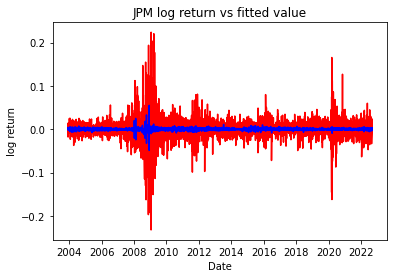

In [65]:
plt.plot(Y,color='red')
plt.plot(Y_hat,color='Blue')
plt.xlabel('Date')
plt.ylabel('log return')
plt.title('JPM log return vs fitted value')

An useful graph cold be related to residual

Text(0.5, 1.0, 'JPM log return vs fitted value')

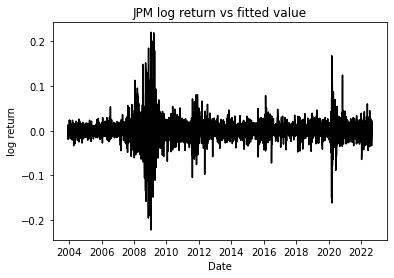

In [72]:
plt.plot(res,color='black')
plt.xlabel('Date')
plt.ylabel('log return')
plt.title('JPM log return vs fitted value')

We can also find the mean of JPM logreturns.

In [25]:
Y_mean=np.mean(Y)
Y_mean.head(1)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


JPM    0.000256
dtype: float64

Now we can define the residues Y-Y_hat and RSS,TSS,ESS and Rsquare.

In [26]:
res = Y - Y_hat 
RSS = (res.T @ res)

In [27]:
TSS = ((Y - Y_mean).T @ (Y - Y_mean))
ESS = ((Y_hat - Y_mean).T @ (Y_hat - Y_mean))

In [28]:
R_2 = 1-(RSS/TSS)  

In [29]:
R_2_ = (ESS/TSS)

In [30]:
Observation=pd.concat([RSS,ESS,TSS,R_2],join='inner',axis=1)
Observation.columns=['RSS','ESS','TSS','R square']
Observation.head()

,RSS,ESS,TSS,R square
JPM,2.469238,0.030402,2.49964,0.012163


We can also calculate the variance/covariance matrix.
First we need the variance that can be calculated by dividing RSS with the the difference between 
T and K where they respectively represent the numer of data for each column and the number of regressor

In [32]:
T = X.shape[0] 
K = X.shape[1] 
print(T,K)

4696 3


In [33]:
sig_2 = RSS/(T-K)

Now we have all the input for the Var_Cov matrix:
We use the formula: variance*(X'X)^(-1).
In order to avoid error is usually better covert the dataFrame in a numpy object.

In [43]:
sig_2=sig_2.to_numpy()

In [46]:
var_cov= (np.linalg.inv(X.T @ X) * sig_2)
print(var_cov)

[[ 1.82179098e-07  2.80110737e-07 -5.52906188e-08]
 [ 2.80110737e-07  2.04193875e-03 -1.59200726e-07]
 [-5.52906188e-08 -1.59200726e-07  4.35892250e-08]]


In order to obtain the conditional standard deviation we have to do the square root of the elements on the diagonal

In [48]:
standard_errors = np.sqrt(np.diag(var_cov)) 
standard_errors

array([0.00042682, 0.04518782, 0.00020878])

In [49]:
coeffs["S.E."] = standard_errors 
coeffs

,JPM,S.E.
Constant,0.000409,0.000427
EUR USD,0.343014,0.045188
FED FUNDS,-0.000111,0.000209
